In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from unet.dataset import TrainFloodDataset, ValFloodDataset
from unet.utils import visualize_example

%load_ext autoreload
%autoreload 2

# Dataset Exploration

Run the following cells to get an overview of the flood image dataset and visualize training examples:

In [2]:
root_data_path = "../data"

frame_path = os.path.join(root_data_path, "image")
mask_path = os.path.join(root_data_path, "mask")

# Get list of all available frames and masks
available_frames = sorted([os.path.join(frame_path, path) for path in os.listdir(frame_path)])
available_masks = sorted([os.path.join(mask_path, path) for path in os.listdir(mask_path)])

print(f"Num Frames: {len(available_frames):,}")
print(f"Num Masks: {len(available_masks):,}")

Num Frames: 290
Num Masks: 290


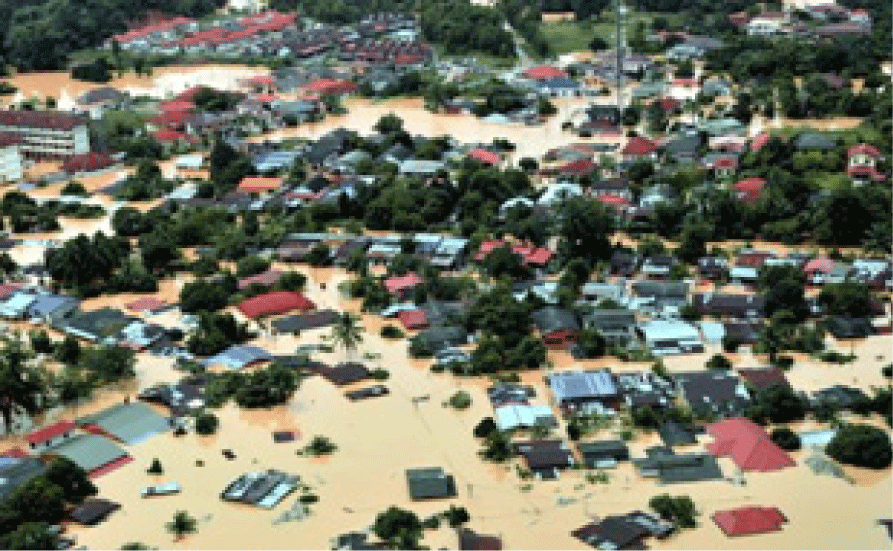

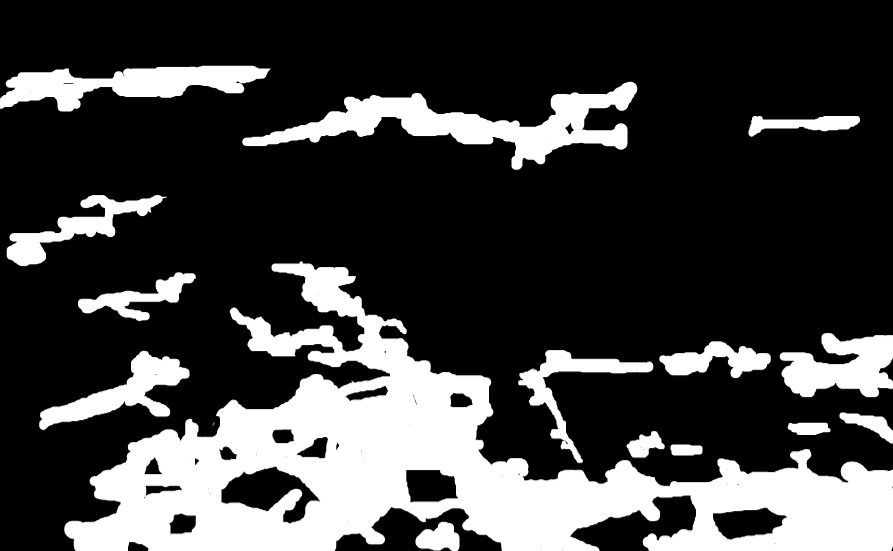

In [3]:
idx = 0

frame = Image.open(available_frames[idx]).convert("RGB")
mask = Image.open(available_masks[idx]).convert("L")

display(frame)
display(mask)

## Train & Validation Split

In order to evaluate our model as it trains, we can split our dataset into training and validation segments.

In [4]:
meta_path = os.path.join(root_data_path, "metadata.csv")
meta_df = pd.read_csv(meta_path)

In [5]:
# Shuffle rows of DataFrame with random state
shuffled_df = meta_df.sample(frac=1.0, random_state=42)

# Take top X% of rows, where X is the percentage of training data to use
# For this example, we use 85%
training_proportion = 0.85
num_training_examples = int(training_proportion * meta_df.shape[0])

train_df = shuffled_df.iloc[:num_training_examples, :]
val_df = shuffled_df.iloc[num_training_examples:, :]

print(f"Num Training Examples: {train_df.shape[0]}")
print(f"Num Validation Examples: {val_df.shape[0]}")

Num Training Examples: 246
Num Validation Examples: 44


In [6]:
train_path = os.path.join(root_data_path, "train.csv")
val_path = os.path.join(root_data_path, "val.csv")

# Write new CSV files for train and val
write_new_files = False

if write_new_files:
    train_df.to_csv(train_path, index=None)
    val_df.to_csv(val_path, index=None)

## Dataset Loading

Create the training and validation datasets with the following code:

In [18]:
train_dataset = TrainFloodDataset(
    examples_path="../data/train.csv", 
    image_dir="../data/image", 
    mask_dir="../data/mask",
    resize_height=360,
    apply_augmentations=True,
)

val_dataset = ValFloodDataset(
    examples_path="../data/val.csv", 
    image_dir="../data/image", 
    mask_dir="../data/mask",
    resize_height=360,
    apply_augmentations=False,
)

Image Shape: 	torch.Size([3, 360, 360])
Mask Shape: 	torch.Size([1, 360, 360])


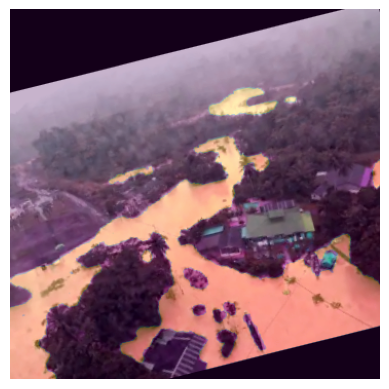

In [27]:
fig, ax = visualize_example(dataset=train_dataset, idx=3, alpha=0.3)

Image Shape: 	torch.Size([3, 360, 360])
Mask Shape: 	torch.Size([1, 360, 360])


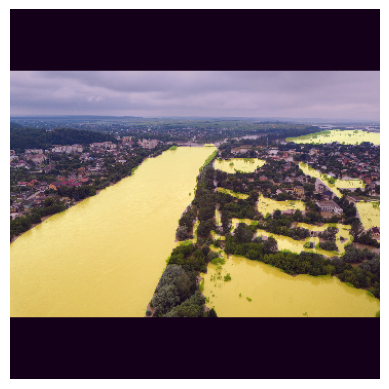

In [32]:
fig, ax = visualize_example(dataset=val_dataset, idx=12, alpha=0.3)